To download the onlinedataset fraud use the link below and then run both the codes

https://www.kaggle.com/datasets/jainilcoder/online-payment-fraud-detection

Importing the Libraries

Doing Downslamping

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("final_dataset_down.csv")

In [3]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,183806.32,5339622,19391.00,0.00,123305,382572.19,566378.51,0
1,3,521.37,3397158,0.00,0.00,2085113,0.00,0.00,0
2,3,3478.18,2294486,19853.00,16374.82,2325890,0.00,0.00,0
3,3,1716.05,6069996,5769.17,4053.13,1003210,0.00,0.00,0
4,0,253129.93,3344533,1328499.49,1581629.42,396862,2713220.48,2460090.55,0


In [4]:
df.shape

(16426, 9)

In [5]:
df.columns

Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [6]:
df = df.drop(columns = ["nameOrig","nameDest"])

New Features Added Considering the Midsem Feedback

In [7]:
df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [8]:
df['relativeAmountOrig'] = df['amount'] / (df['oldbalanceOrg'] + 1e-5) ### added small amount tp prevent division by zero

In [9]:
df.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'balance_change', 'relativeAmountOrig'],
      dtype='object')

1. We have added blanace change to see if fraud happens on large amounts or small amounts -> Detect suspecious transcations
2. We have added relativeAmount column to see the intensity of transcation amount wrt the original bank account this in a way NORMAILISES/ STANDARDISES THE SCAM AMOUNT

In [10]:
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balance_change,relativeAmountOrig
0,1,183806.32,19391.00,0.00,382572.19,566378.51,0,19391.00,9.478950e+00
1,3,521.37,0.00,0.00,0.00,0.00,0,0.00,5.213700e+07
2,3,3478.18,19853.00,16374.82,0.00,0.00,0,3478.18,1.751967e-01
3,3,1716.05,5769.17,4053.13,0.00,0.00,0,1716.04,2.974518e-01
4,0,253129.93,1328499.49,1581629.42,2713220.48,2460090.55,0,-253129.93,1.905382e-01
...,...,...,...,...,...,...,...,...,...
16421,1,339682.13,339682.13,0.00,0.00,339682.13,1,339682.13,1.000000e+00
16422,4,6311409.28,6311409.28,0.00,0.00,0.00,1,6311409.28,1.000000e+00
16423,1,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,6311409.28,1.000000e+00
16424,4,850002.52,850002.52,0.00,0.00,0.00,1,850002.52,1.000000e+00


In [11]:
y = df["isFraud"]
X = df.drop("isFraud", axis=1)


In [12]:
X.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'balance_change', 'relativeAmountOrig'],
      dtype='object')

In [13]:
print(X)

       type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0         1   183806.32       19391.00            0.00       382572.19   
1         3      521.37           0.00            0.00            0.00   
2         3     3478.18       19853.00        16374.82            0.00   
3         3     1716.05        5769.17         4053.13            0.00   
4         0   253129.93     1328499.49      1581629.42      2713220.48   
...     ...         ...            ...             ...             ...   
16421     1   339682.13      339682.13            0.00            0.00   
16422     4  6311409.28     6311409.28            0.00            0.00   
16423     1  6311409.28     6311409.28            0.00        68488.84   
16424     4   850002.52      850002.52            0.00            0.00   
16425     1   850002.52      850002.52            0.00      6510099.11   

       newbalanceDest  balance_change  relativeAmountOrig  
0           566378.51        19391.00        9.4789

In [14]:
X.shape

(16426, 8)

In [15]:
y.shape

(16426,)

In [16]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
X_test

array([[ 1.2853217 , -0.02586083, -0.14609711, ..., -0.30652365,
         0.03038805, -0.1327293 ],
       [ 1.2853217 , -0.42756933, -0.37697642, ..., -0.30652365,
        -0.37003367, -0.1327293 ],
       [ 0.61044837, -0.43427827, -0.36480103, ..., -0.30652365,
        -0.37672111, -0.1327293 ],
       ...,
       [ 1.2853217 , -0.43289437, -0.38003695, ..., -0.30652365,
        -0.37534165, -0.1327293 ],
       [ 1.2853217 ,  0.65480929,  0.24511356, ..., -0.30652365,
         0.70887782, -0.1327293 ],
       [ 1.2853217 , -0.06599029, -0.16916125, ..., -0.30652365,
        -0.00961286, -0.1327293 ]])

In [20]:
X_train

array([[ 1.2853217 , -0.34059459, -0.37777775, ..., -0.16047343,
        -0.37142345, -0.1327293 ],
       [-1.41417162, -0.43095661,  0.04408058, ...,  1.64091595,
        -0.40078571, -0.1327293 ],
       [ 1.2853217 , -0.31183334, -0.31045792, ..., -0.30652365,
        -0.25466841, -0.1327293 ],
       ...,
       [-0.73929829, -0.44011333, -0.37950582, ..., -0.28700423,
        -0.38253749, -0.1327293 ],
       [-1.41417162, -0.30139651,  2.1666411 , ..., -0.27023339,
        -0.5299308 , -0.1327293 ],
       [-0.73929829, -0.31982124, -0.31504891, ..., -0.2390569 ,
        -0.26263072, -0.1327293 ]])

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

We have added KNN, Decision Tree, Random Forest and SVM after Midsem project

Logistic Regression
Model performance for Training set
- Accuracy: 0.892930
- F1 score: 0.892319
- Precision: 0.902350
- Recall: 0.892930
----------------------------------
Model performance for Test set
- Accuracy: 0.894570
- F1 score: 0.893965
- Precision: 0.902914
- Recall: 0.894570


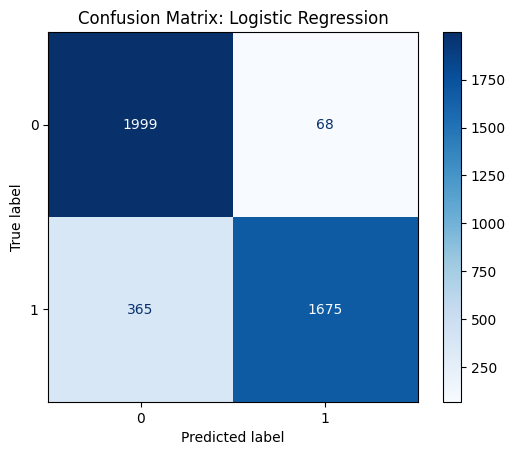

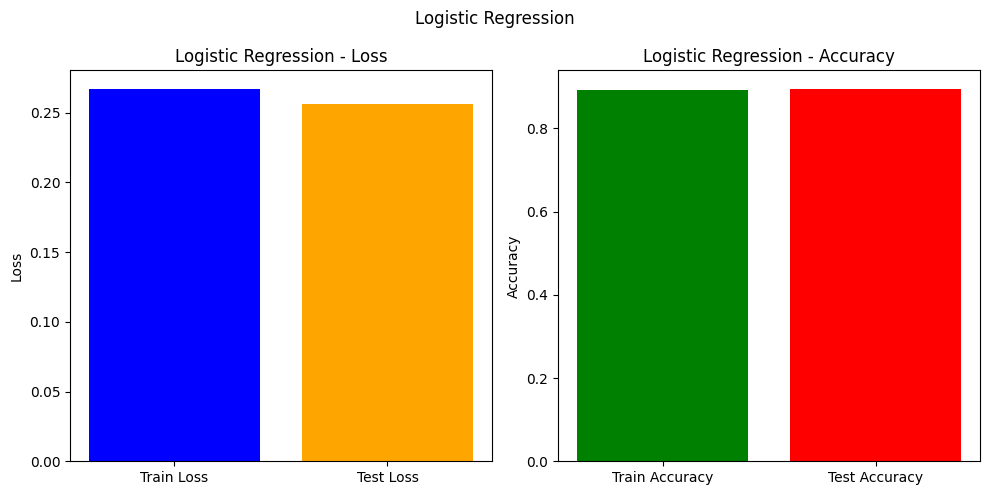

Naive Bayes
Model performance for Training set
- Accuracy: 0.809644
- F1 score: 0.805672
- Precision: 0.837779
- Recall: 0.809644
----------------------------------
Model performance for Test set
- Accuracy: 0.823959
- F1 score: 0.820267
- Precision: 0.851279
- Recall: 0.823959


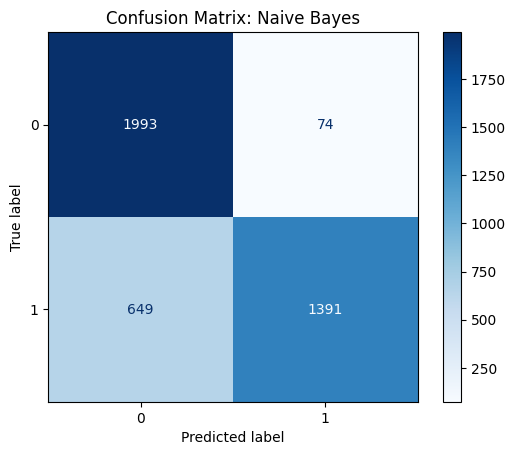

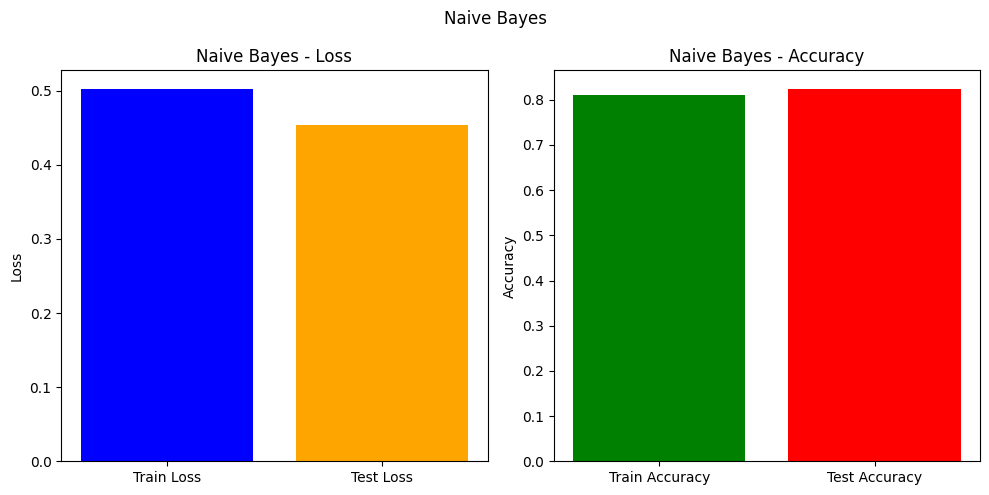

Perceptron
Model performance for Training set
- Accuracy: 0.776605
- F1 score: 0.768854
- Precision: 0.818722
- Recall: 0.776605
----------------------------------
Model performance for Test set
- Accuracy: 0.786706
- F1 score: 0.779510
- Precision: 0.832003
- Recall: 0.786706


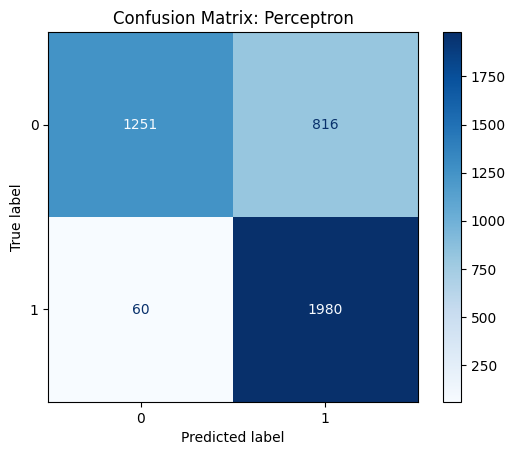

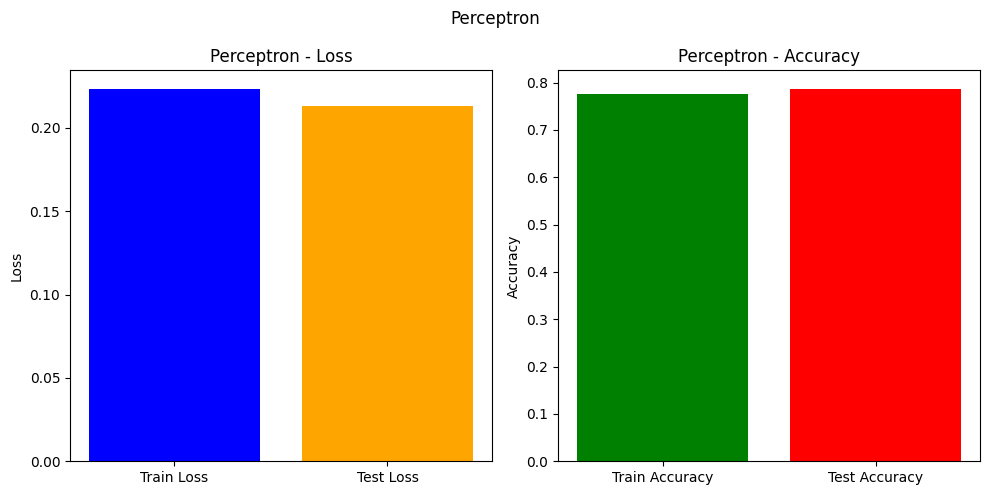

DecisionTreeClassifier
Model performance for Training set
- Accuracy: 0.975404
- F1 score: 0.975403
- Precision: 0.975454
- Recall: 0.975404
----------------------------------
Model performance for Test set
- Accuracy: 0.976869
- F1 score: 0.976868
- Precision: 0.976882
- Recall: 0.976869


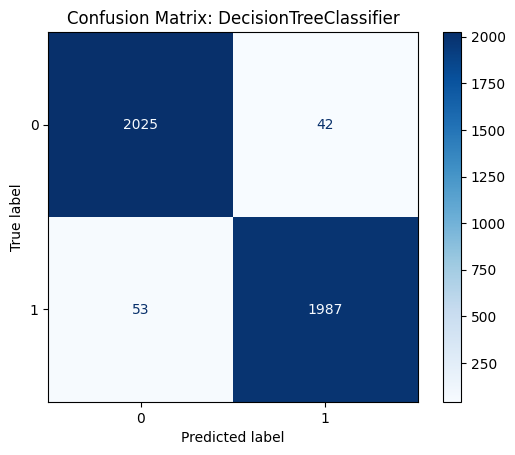

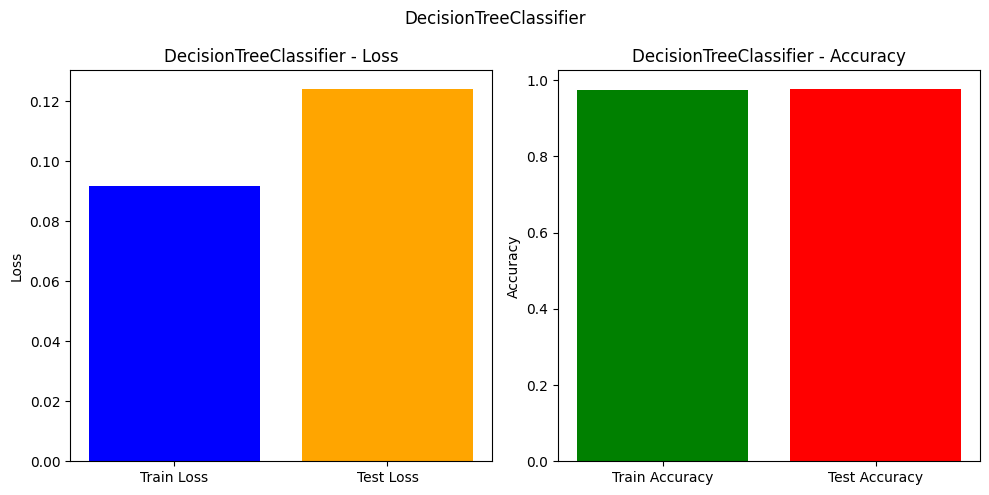

RandomForestClassifier
Model performance for Training set
- Accuracy: 0.988473
- F1 score: 0.988472
- Precision: 0.988596
- Recall: 0.988473
----------------------------------
Model performance for Test set
- Accuracy: 0.987095
- F1 score: 0.987095
- Precision: 0.987273
- Recall: 0.987095


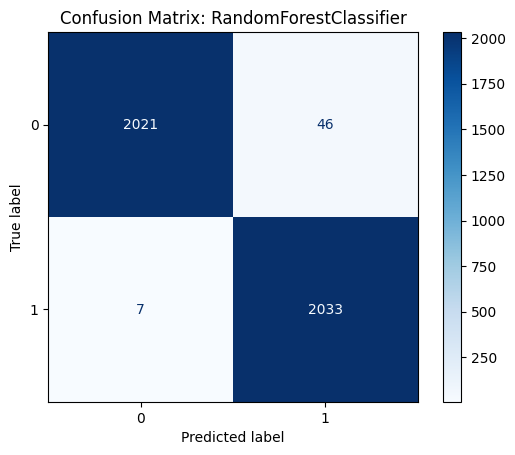

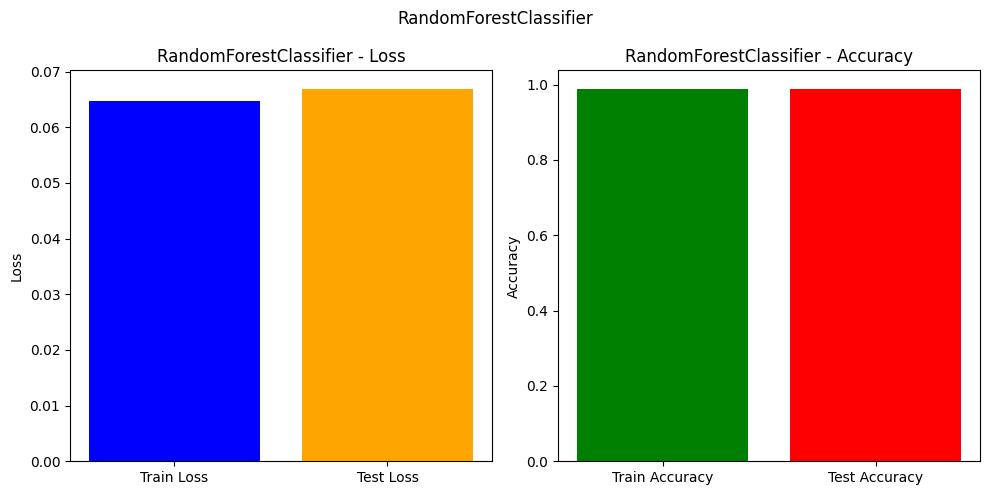

KNN
Model performance for Training set
- Accuracy: 0.860459
- F1 score: 0.858852
- Precision: 0.877240
- Recall: 0.860459
----------------------------------
Model performance for Test set
- Accuracy: 0.850012
- F1 score: 0.848221
- Precision: 0.868679
- Recall: 0.850012


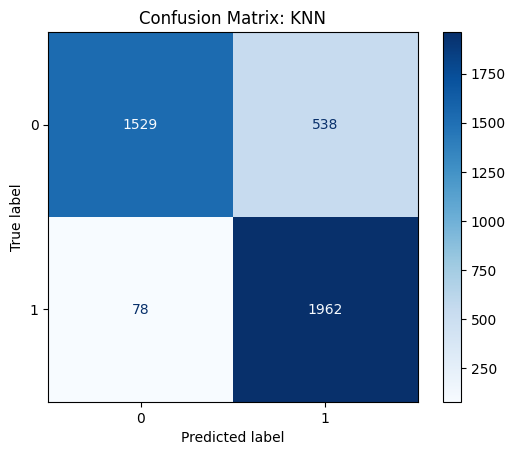

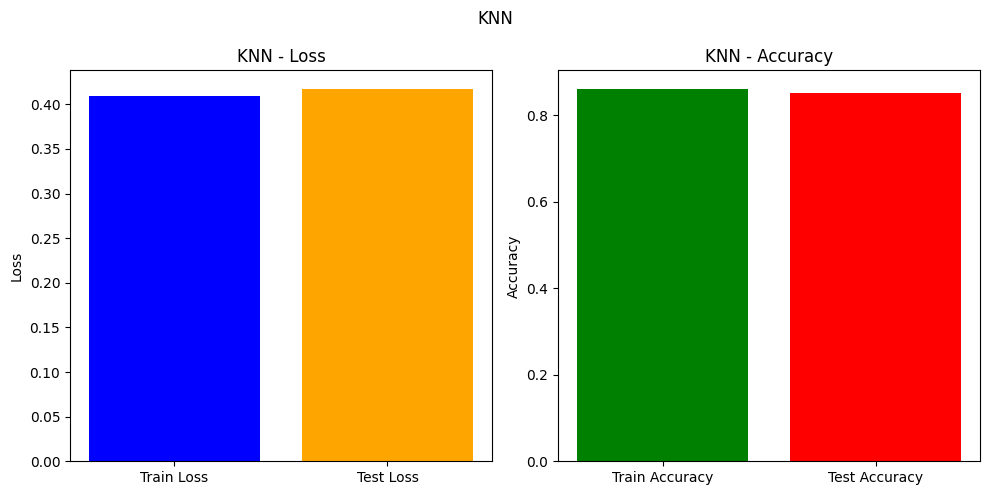

SVM
Model performance for Training set
- Accuracy: 0.924345
- F1 score: 0.924164
- Precision: 0.928618
- Recall: 0.924345
----------------------------------
Model performance for Test set
- Accuracy: 0.934746
- F1 score: 0.934619
- Precision: 0.937643
- Recall: 0.934746


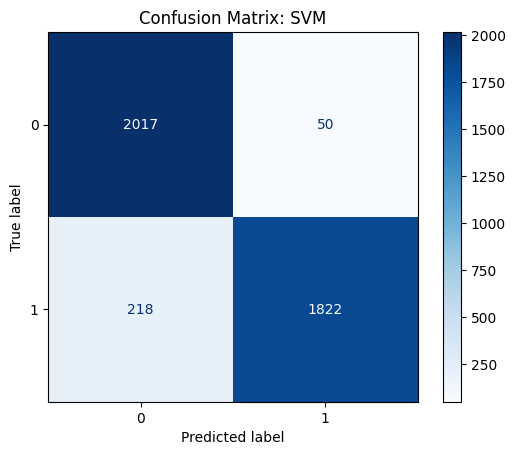

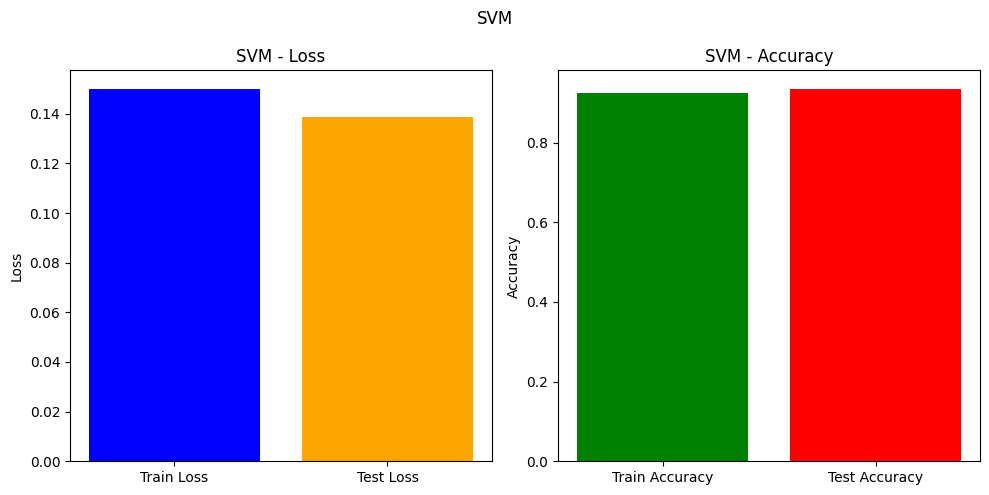

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
)
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# define a dictionary of models 
models = {
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(n_jobs=-1),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier": RandomForestClassifier(max_depth=7,n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors = 2530,n_jobs=-1), ### k = sqrt(n)
    "SVM": SVC(probability=True)
}

# function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# function to plot train/test loss and accuracy 
def plot_loss_and_accuracy(train_loss, test_loss, train_acc, test_acc, model_name):
    plt.figure(figsize=(10, 5))

    # subplot for loss
    plt.subplot(1, 2, 1)
    plt.bar(["Train Loss", "Test Loss"], [train_loss, test_loss], color=['blue', 'orange'])
    plt.title(f"{model_name} - Loss")
    plt.ylabel("Loss")

    # subplots for accuracy
    plt.subplot(1, 2, 2)
    plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=['green', 'red'])
    plt.title(f"{model_name} - Accuracy")
    plt.ylabel("Accuracy")

    # displaying the plots
    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()

# iterating through each model and fit evaluatte and plot metrics 
for model_name, model in models.items():
    model.fit(X_train, y_train)  
    # making predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # probabilities for log loss 
    try:
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)
    except AttributeError:  
        y_train_prob = None
        y_test_prob = None
    train_loss = (
        log_loss(y_train, y_train_prob) if y_train_prob is not None else 1 - accuracy_score(y_train, y_train_pred)
    )
    test_loss = (
        log_loss(y_test, y_test_prob) if y_test_prob is not None else 1 - accuracy_score(y_test, y_test_pred)
    )

    # calculating accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(model_name)
    print('Model performance for Training set')
    print("- Accuracy: {:.6f}".format(train_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_train, y_train_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_train, y_train_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_train, y_train_pred, average='weighted')))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.6f}'.format(test_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_test, y_test_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_test, y_test_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_test, y_test_pred, average='weighted')))
    print('=' * 35)

    # displaying confusion matrix for test set
    display_confusion_matrix(y_test, y_test_pred, model_name)

    # plotting loss and accuracy 
    plot_loss_and_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, model_name)


Doing RFE For Downsampling

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.

Applying RFE and evaluating: Logistic Regression
Selected feature indices: [2 3 4 5 6]
Logistic Regression Performance
Model performance for Training set
- Accuracy: 0.886679
- F1 score: 0.885930
- Precision: 0.897441
- Recall: 0.886679
----------------------------------
Model performance for Test set
- Accuracy: 0.885561
- F1 score: 0.884839
- Precision: 0.894574
- Recall: 0.885561


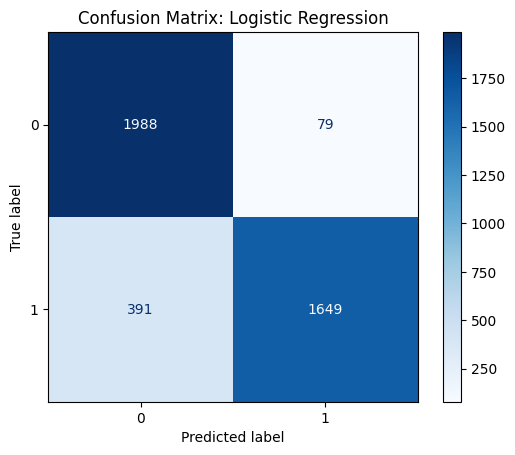

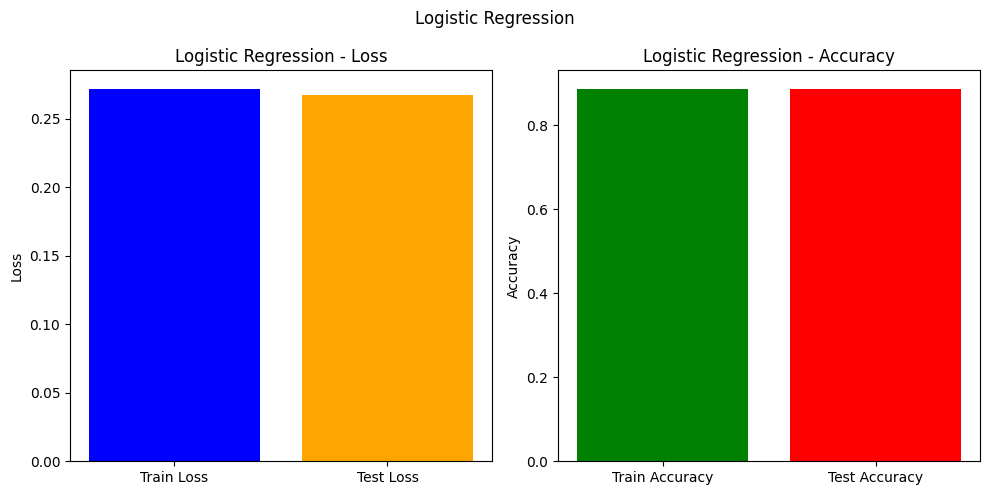


Applying RFE and evaluating: DecisionTreeClassifier
Selected feature indices: [0 1 3 5 6]
DecisionTreeClassifier Performance
Model performance for Training set
- Accuracy: 0.975404
- F1 score: 0.975403
- Precision: 0.975454
- Recall: 0.975404
----------------------------------
Model performance for Test set
- Accuracy: 0.976869
- F1 score: 0.976868
- Precision: 0.976882
- Recall: 0.976869


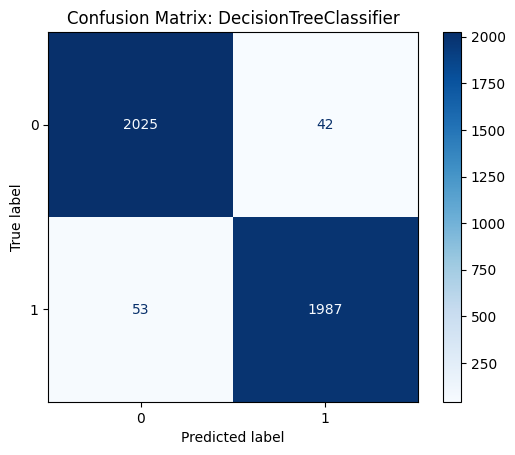

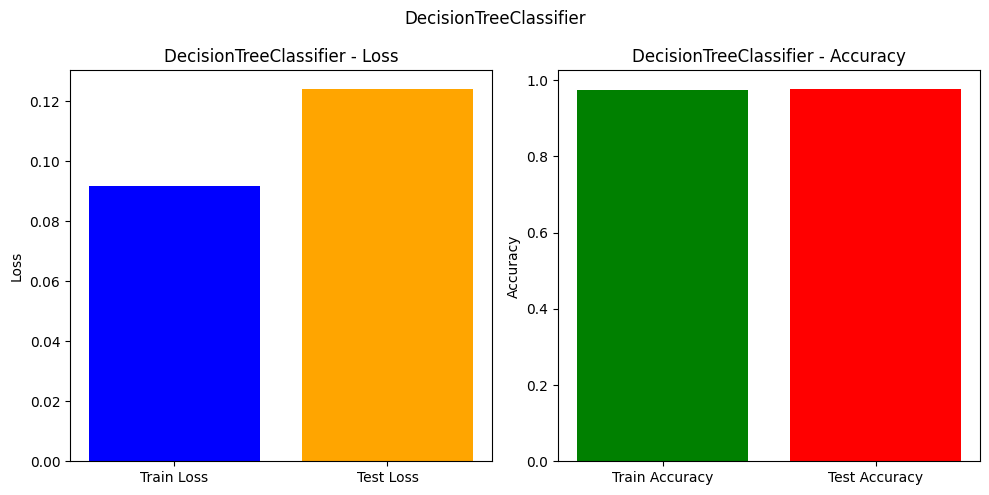


Applying RFE and evaluating: RandomForestClassifier
Selected feature indices: [0 1 2 3 6]
RandomForestClassifier Performance
Model performance for Training set
- Accuracy: 0.973050
- F1 score: 0.973050
- Precision: 0.973050
- Recall: 0.973050
----------------------------------
Model performance for Test set
- Accuracy: 0.977356
- F1 score: 0.977356
- Precision: 0.977390
- Recall: 0.977356


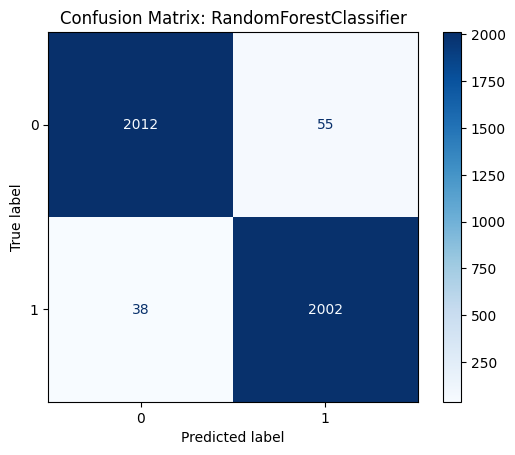

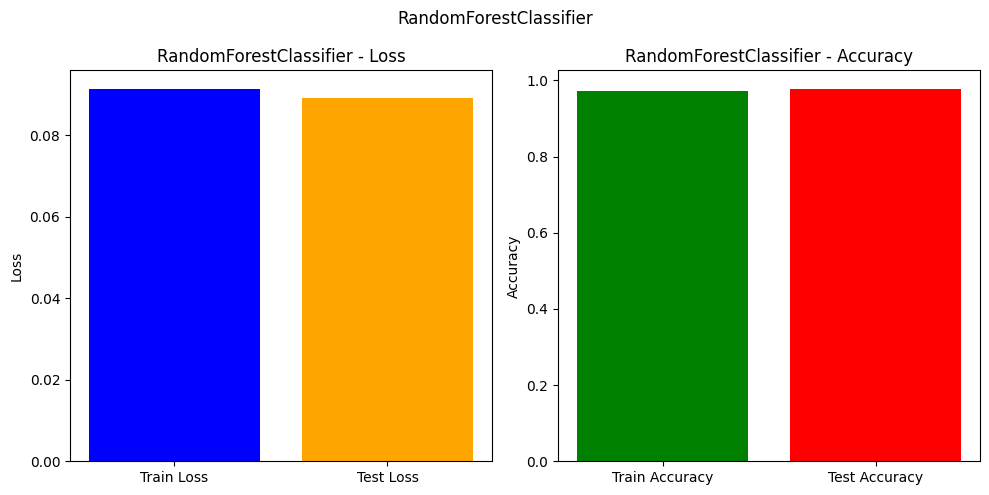


Applying RFE and evaluating: SVM
Selected feature indices: [2 3 4 5 6]
SVM Performance
Model performance for Training set
- Accuracy: 0.891144
- F1 score: 0.890581
- Precision: 0.899649
- Recall: 0.891144
----------------------------------
Model performance for Test set
- Accuracy: 0.892135
- F1 score: 0.891624
- Precision: 0.898900
- Recall: 0.892135


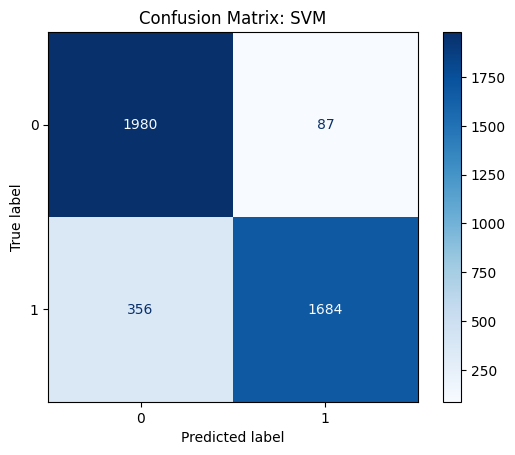

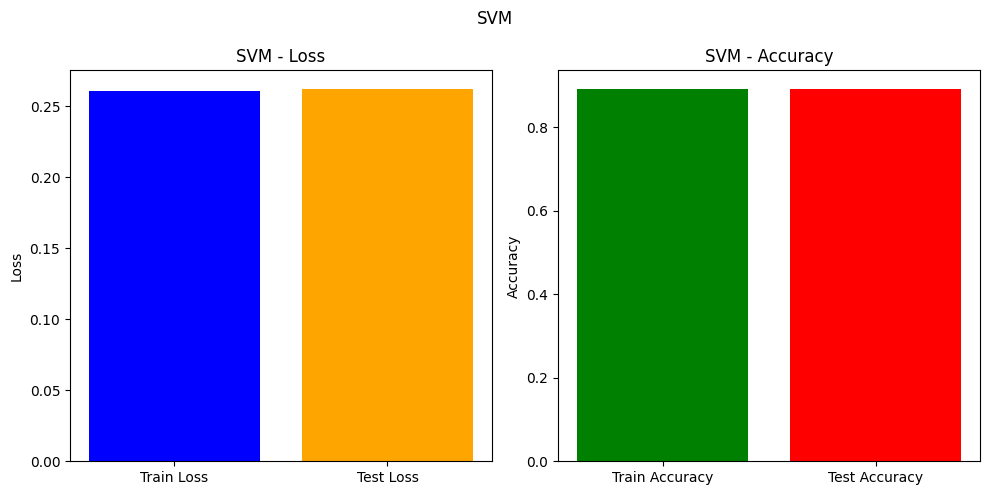

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
)
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import numpy as np

# defining dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier": RandomForestClassifier(max_depth=5,n_jobs=-1),
    "SVM": SVC(kernel='linear',probability=True)
}

# function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# function to plot train/test loss and accuracy
def plot_loss_and_accuracy(train_loss, test_loss, train_acc, test_acc, model_name):
    plt.figure(figsize=(10, 5))

    # subplot for loss
    plt.subplot(1, 2, 1)
    plt.bar(["Train Loss", "Test Loss"], [train_loss, test_loss], color=['blue', 'orange'])
    plt.title(f"{model_name} - Loss")
    plt.ylabel("Loss")

    # subplot for accuracy
    plt.subplot(1, 2, 2)
    plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=['green', 'red'])
    plt.title(f"{model_name} - Accuracy")
    plt.ylabel("Accuracy")

    # displaying the plots
    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()

# applying RFE
for model_name, model in models.items():
    print(f"\nApplying RFE and evaluating: {model_name}")

    # perforn RFE on training data
    rfe = RFE(estimator=model, n_features_to_select=5)  # keeping top 5 features
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    selected_features = np.where(rfe.support_)[0]
    print(f"Selected feature indices: {selected_features}")

    # training models with reduced features 
    model.fit(X_train_rfe, y_train)
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)

    # probabilities for log loss 
    try:
        y_train_prob = model.predict_proba(X_train_rfe)
        y_test_prob = model.predict_proba(X_test_rfe)
    except AttributeError: 
        y_train_prob = None
        y_test_prob = None
    train_loss = (
        log_loss(y_train, y_train_prob) if y_train_prob is not None else 1 - accuracy_score(y_train, y_train_pred)
    )
    test_loss = (
        log_loss(y_test, y_test_prob) if y_test_prob is not None else 1 - accuracy_score(y_test, y_test_pred)
    )

    # calculating accuracy 
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"{model_name} Performance")
    print('Model performance for Training set')
    print("- Accuracy: {:.6f}".format(train_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_train, y_train_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_train, y_train_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_train, y_train_pred, average='weighted')))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.6f}'.format(test_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_test, y_test_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_test, y_test_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_test, y_test_pred, average='weighted')))
    print('=' * 35)

    # displaying confusion matrix
    display_confusion_matrix(y_test, y_test_pred, model_name)

    # plotting loss and accuracy
    plot_loss_and_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, model_name)


Doing Upsampling

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [11]:
# load the upsampled dataset
df = pd.read_csv("final_dataset_up_new.csv")
df.head()
df.shape

(6354408, 9)

In [12]:
# feature extraction (dropping unnecessary columns)
df = df.drop(columns=["nameOrig", "nameDest"])

In [13]:
df['balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [14]:
df['relativeAmountOrig'] = df['amount'] / (df['oldbalanceOrg'] + 1e-5)

In [15]:
y = df["isFraud"]
X = df.drop("isFraud", axis=1)

In [16]:
X.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'balance_change', 'relativeAmountOrig'],
      dtype='object')

In [17]:
# checking the shape of X and y
X.head()
X.shape

# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


Logistic Regression
Model performance for Training set
- Accuracy: 0.911075
- F1 score: 0.910831
- Precision: 0.915577
- Recall: 0.911075
----------------------------------
Model performance for Test set
- Accuracy: 0.911128
- F1 score: 0.910890
- Precision: 0.915678
- Recall: 0.911128


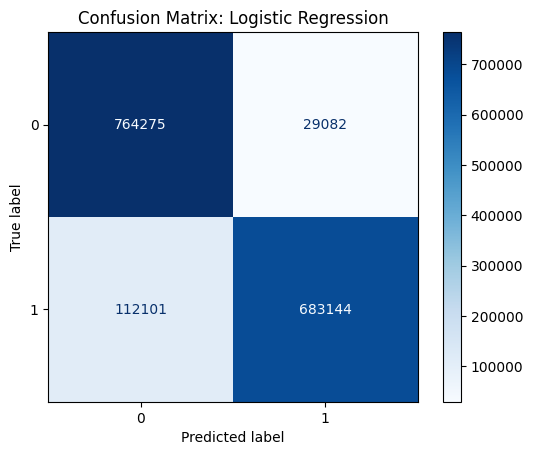

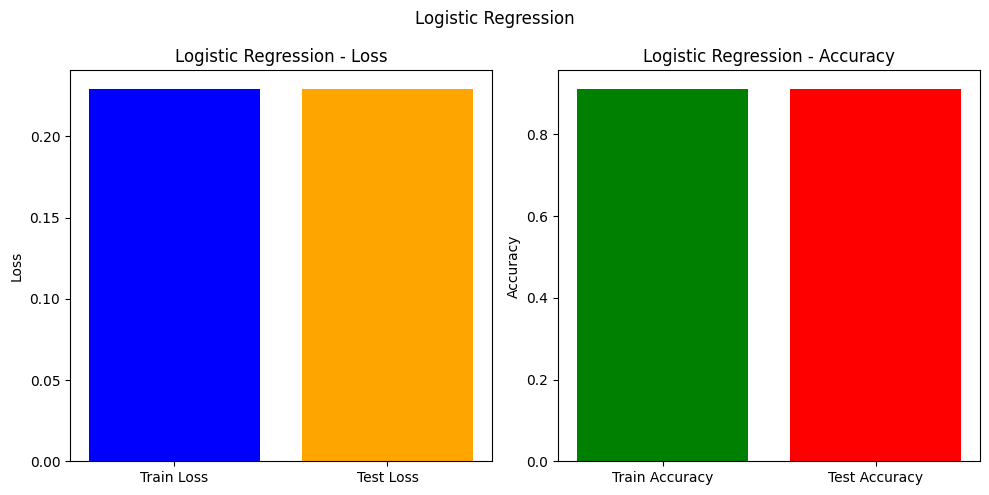

Naive Bayes
Model performance for Training set
- Accuracy: 0.820850
- F1 score: 0.818040
- Precision: 0.841891
- Recall: 0.820850
----------------------------------
Model performance for Test set
- Accuracy: 0.820571
- F1 score: 0.817778
- Precision: 0.841768
- Recall: 0.820571


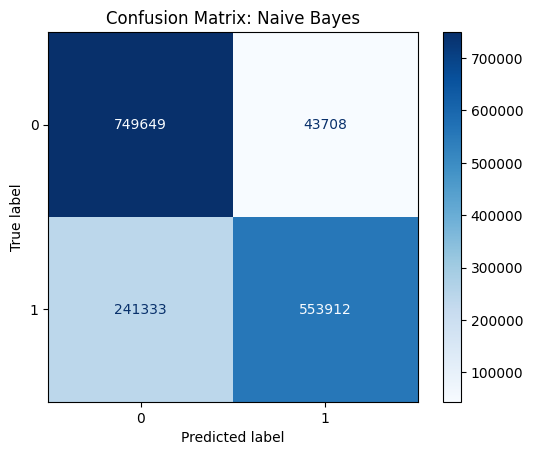

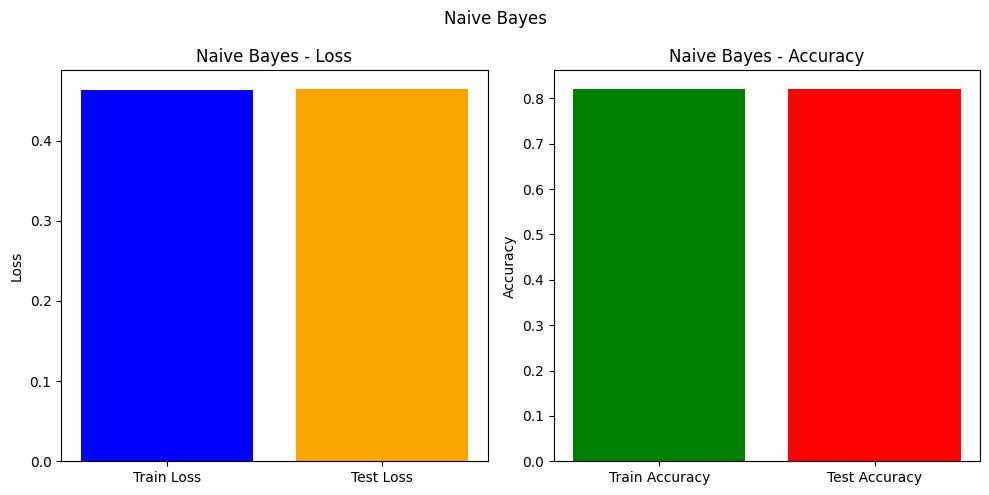

Perceptron
Model performance for Training set
- Accuracy: 0.738996
- F1 score: 0.724472
- Precision: 0.803036
- Recall: 0.738996
----------------------------------
Model performance for Test set
- Accuracy: 0.739627
- F1 score: 0.725086
- Precision: 0.803397
- Recall: 0.739627


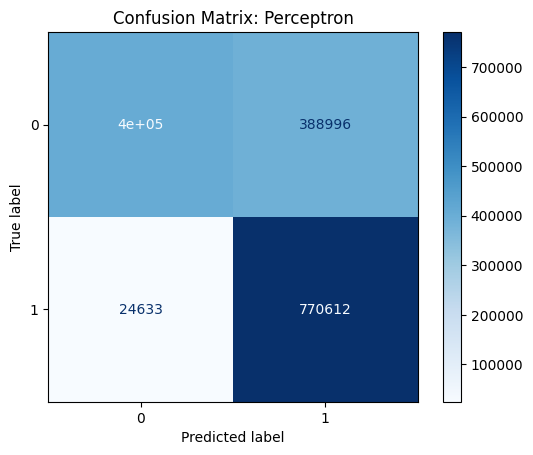

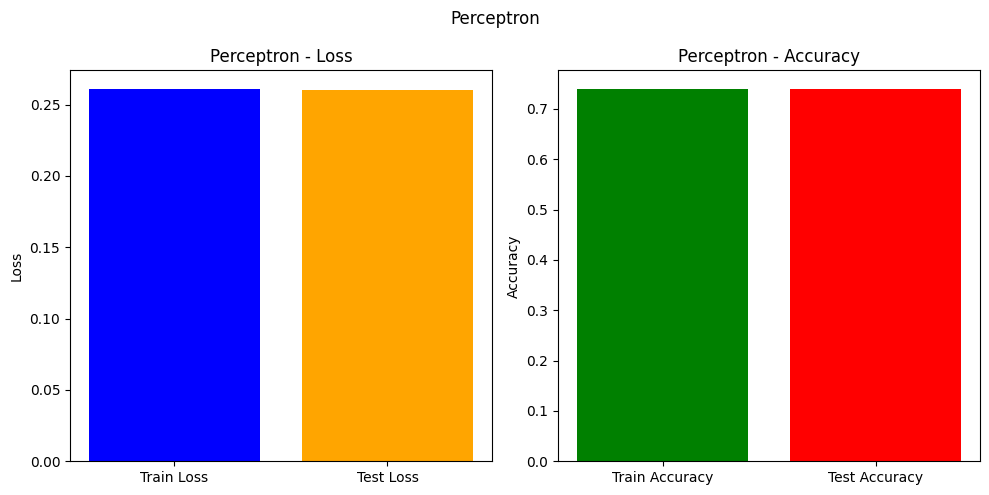

DecisionTreeClassifier
Model performance for Training set
- Accuracy: 0.976405
- F1 score: 0.976405
- Precision: 0.976416
- Recall: 0.976405
----------------------------------
Model performance for Test set
- Accuracy: 0.976569
- F1 score: 0.976568
- Precision: 0.976580
- Recall: 0.976569


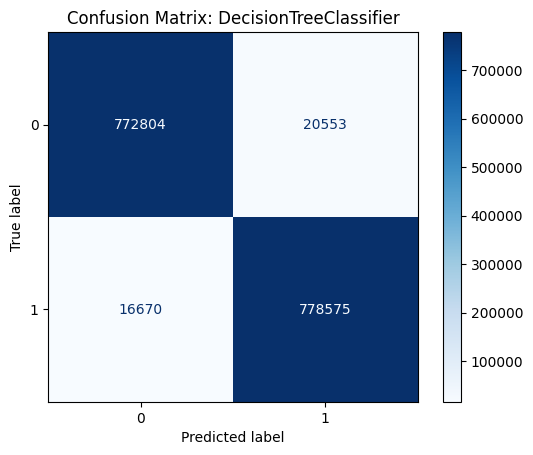

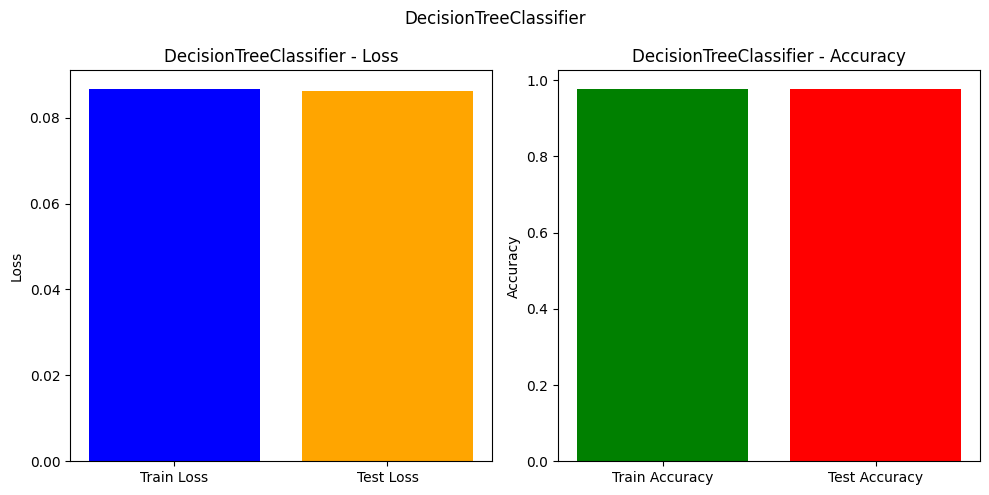

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
)
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# defining dictonary of models 
models = {
    "Logistic Regression": LogisticRegression(n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "Perceptron": Perceptron(n_jobs=-1),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier": RandomForestClassifier(max_depth=8,n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=2530,n_jobs=-1)
    # "SVM": SVC(probability=True)
}

# function to display confusion matrix 
def display_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# function to plot train/test loss and accuracy 
def plot_loss_and_accuracy(train_loss, test_loss, train_acc, test_acc, model_name):
    plt.figure(figsize=(10, 5))

    # subplots for loss
    plt.subplot(1, 2, 1)
    plt.bar(["Train Loss", "Test Loss"], [train_loss, test_loss], color=['blue', 'orange'])
    plt.title(f"{model_name} - Loss")
    plt.ylabel("Loss")

    # subplots for accuracy
    plt.subplot(1, 2, 2)
    plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=['green', 'red'])
    plt.title(f"{model_name} - Accuracy")
    plt.ylabel("Accuracy")

    # displaying the plots
    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()

# iterating through each model to fit evaluate and plot the metrics 
for model_name, model in models.items():
    model.fit(X_train, y_train)  
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # probabilites for log loss 
    try:
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)
    except AttributeError:  
        y_train_prob = None
        y_test_prob = None
    train_loss = (
        log_loss(y_train, y_train_prob) if y_train_prob is not None else 1 - accuracy_score(y_train, y_train_pred)
    )
    test_loss = (
        log_loss(y_test, y_test_prob) if y_test_prob is not None else 1 - accuracy_score(y_test, y_test_pred)
    )

    # calculating the accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(model_name)
    print('Model performance for Training set')
    print("- Accuracy: {:.6f}".format(train_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_train, y_train_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_train, y_train_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_train, y_train_pred, average='weighted')))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.6f}'.format(test_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_test, y_test_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_test, y_test_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_test, y_test_pred, average='weighted')))
    print('=' * 35)

    # displaying confusion matrix
    display_confusion_matrix(y_test, y_test_pred, model_name)

    # plotting loss and accuracy 
    plot_loss_and_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, model_name)


RandomForestClassifier
Model performance for Training set
- Accuracy: 0.991613
- F1 score: 0.991612
- Precision: 0.991711
- Recall: 0.991613
----------------------------------
Model performance for Test set
- Accuracy: 0.991702
- F1 score: 0.991701
- Precision: 0.991797
- Recall: 0.991702


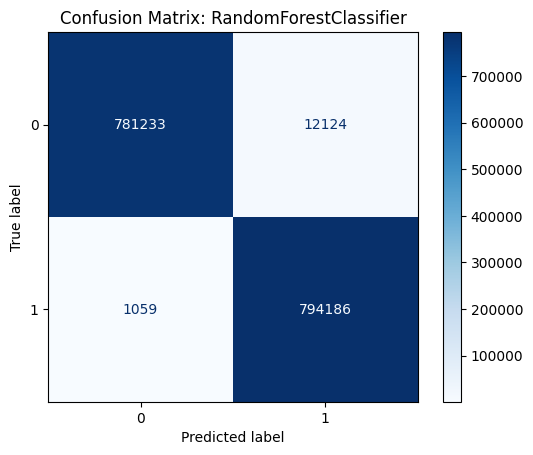

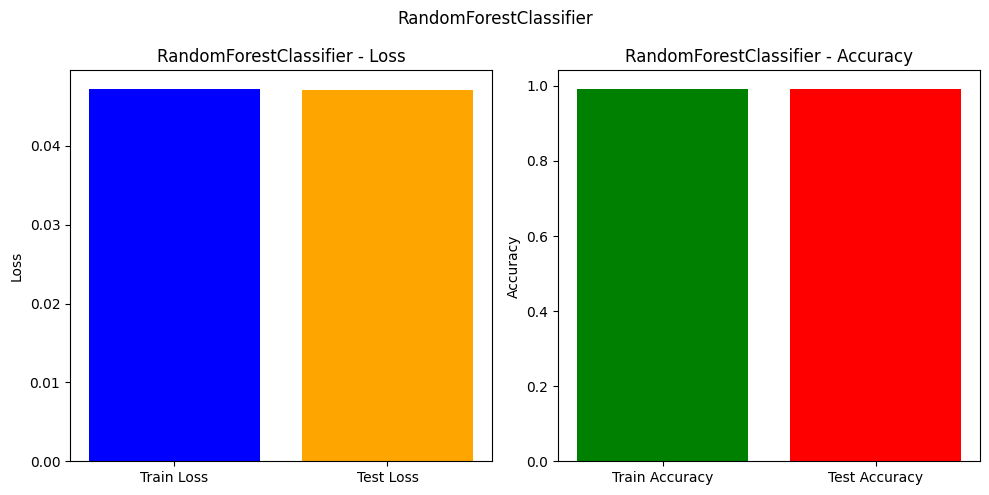

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
)
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# defining dictionary of models 
models = {

    "RandomForestClassifier": RandomForestClassifier(max_depth=8,n_jobs=-1)
    # "SVM": SVC(probability=True)
}

def display_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

# function to plot train/test loss and accuracy 
def plot_loss_and_accuracy(train_loss, test_loss, train_acc, test_acc, model_name):
    plt.figure(figsize=(10, 5))

    # Subplot for Loss
    plt.subplot(1, 2, 1)
    plt.bar(["Train Loss", "Test Loss"], [train_loss, test_loss], color=['blue', 'orange'])
    plt.title(f"{model_name} - Loss")
    plt.ylabel("Loss")
    plt.subplot(1, 2, 2)
    plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=['green', 'red'])
    plt.title(f"{model_name} - Accuracy")
    plt.ylabel("Accuracy")

    # displaying the plots
    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()

# iterating thorugh each model to fit evaluate and plot metrics 
for model_name, model in models.items():
    model.fit(X_train, y_train) 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # probabilities for log loss 
    try:
        y_train_prob = model.predict_proba(X_train)
        y_test_prob = model.predict_proba(X_test)
    except AttributeError:  
        y_train_prob = None
        y_test_prob = None

    # calculating the loss
    train_loss = (
        log_loss(y_train, y_train_prob) if y_train_prob is not None else 1 - accuracy_score(y_train, y_train_pred)
    )
    test_loss = (
        log_loss(y_test, y_test_prob) if y_test_prob is not None else 1 - accuracy_score(y_test, y_test_pred)
    )

    # calculating the accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(model_name)
    print('Model performance for Training set')
    print("- Accuracy: {:.6f}".format(train_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_train, y_train_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_train, y_train_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_train, y_train_pred, average='weighted')))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.6f}'.format(test_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_test, y_test_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_test, y_test_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_test, y_test_pred, average='weighted')))
    print('=' * 35)

    # displaying confusion matrix for test set 
    display_confusion_matrix(y_test, y_test_pred, model_name)

    # plotting loss and accuracy
    plot_loss_and_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, model_name)


Doing RFE For Upsampling


Applying RFE and evaluating: Logistic Regression
Selected feature indices: [2 3 4 5 6]
Logistic Regression Performance
Model performance for Training set
- Accuracy: 0.909054
- F1 score: 0.908794
- Precision: 0.913734
- Recall: 0.909054
----------------------------------
Model performance for Test set
- Accuracy: 0.909141
- F1 score: 0.908888
- Precision: 0.913865
- Recall: 0.909141


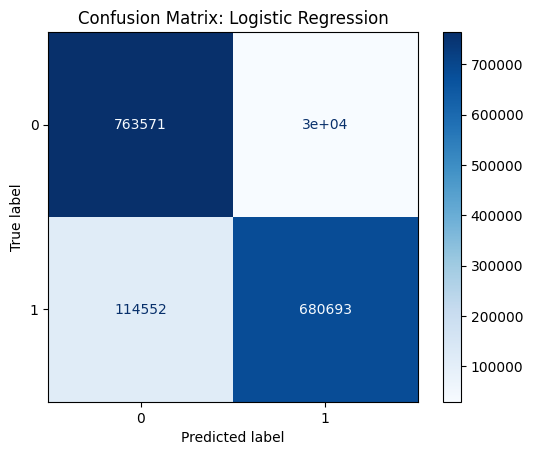

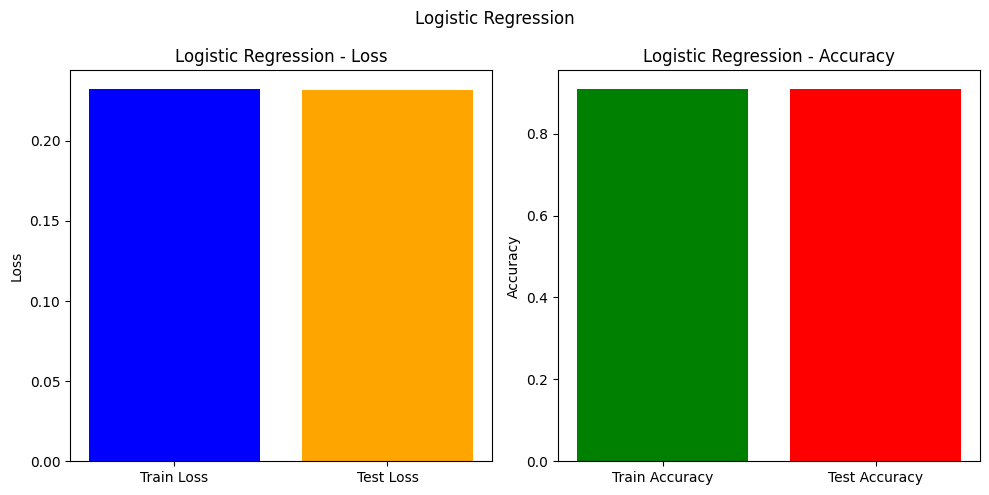


Applying RFE and evaluating: DecisionTreeClassifier
Selected feature indices: [0 1 3 5 6]
DecisionTreeClassifier Performance
Model performance for Training set
- Accuracy: 0.976401
- F1 score: 0.976401
- Precision: 0.976412
- Recall: 0.976401
----------------------------------
Model performance for Test set
- Accuracy: 0.976564
- F1 score: 0.976564
- Precision: 0.976576
- Recall: 0.976564


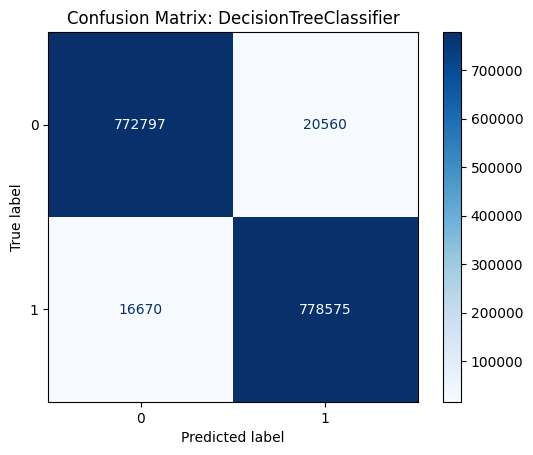

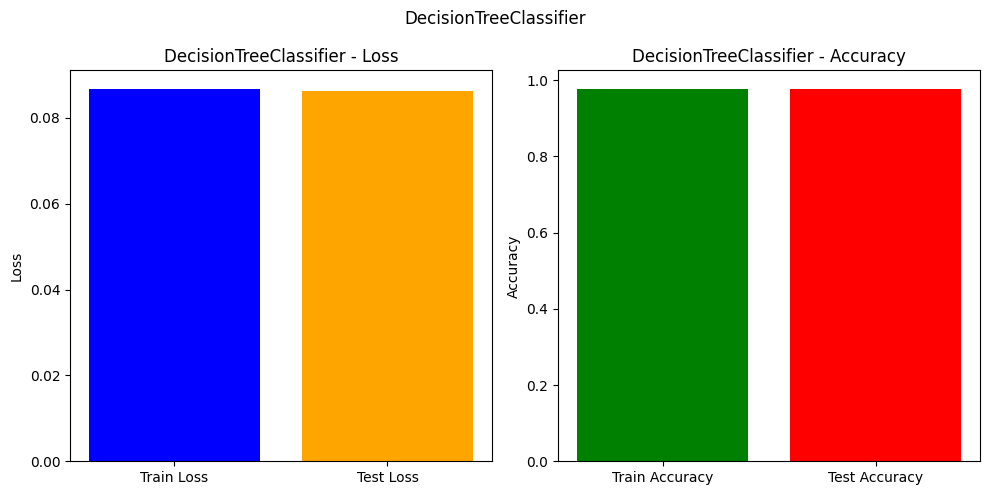


Applying RFE and evaluating: RandomForestClassifier
Selected feature indices: [0 1 2 3 6]
RandomForestClassifier Performance
Model performance for Training set
- Accuracy: 0.993166
- F1 score: 0.993166
- Precision: 0.993197
- Recall: 0.993166
----------------------------------
Model performance for Test set
- Accuracy: 0.993164
- F1 score: 0.993164
- Precision: 0.993194
- Recall: 0.993164


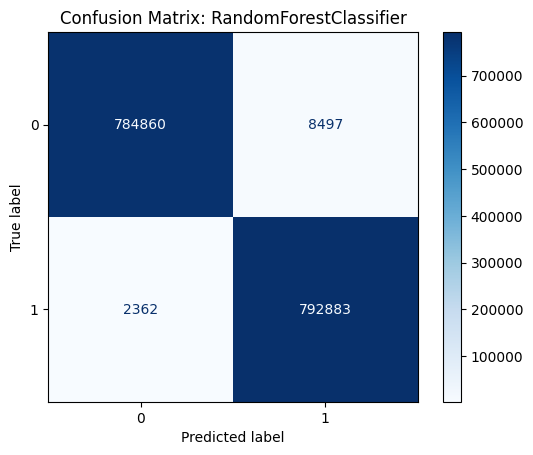

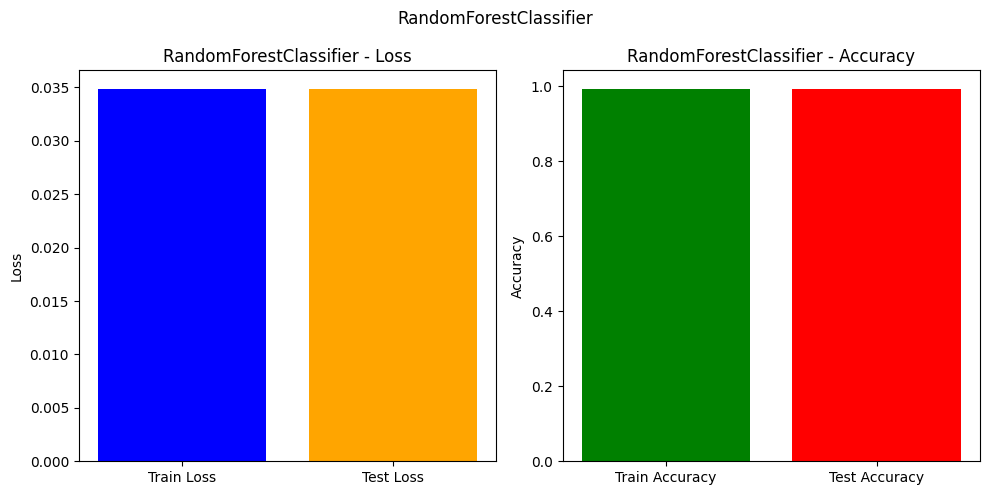

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, log_loss
)
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import numpy as np

# defining dictionary of models
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(max_depth=5),
    "RandomForestClassifier": RandomForestClassifier(max_depth=8,n_jobs=-1)
}

# function to display confusion matrix
def display_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()

def plot_loss_and_accuracy(train_loss, test_loss, train_acc, test_acc, model_name):
    plt.figure(figsize=(10, 5))

    # plotting for loss 
    plt.subplot(1, 2, 1)
    plt.bar(["Train Loss", "Test Loss"], [train_loss, test_loss], color=['blue', 'orange'])
    plt.title(f"{model_name} - Loss")
    plt.ylabel("Loss")

    # plotting for accuracy 
    plt.subplot(1, 2, 2)
    plt.bar(["Train Accuracy", "Test Accuracy"], [train_acc, test_acc], color=['green', 'red'])
    plt.title(f"{model_name} - Accuracy")
    plt.ylabel("Accuracy")

    # displaying the plots 
    plt.suptitle(model_name)
    plt.tight_layout()
    plt.show()

# applying rfe and iterating through the models 
for model_name, model in models.items():
    print(f"\nApplying RFE and evaluating: {model_name}")

    # performing RFE on the training data 
    rfe = RFE(estimator=model, n_features_to_select=5)  # keeping top 5 features
    X_train_rfe = rfe.fit_transform(X_train, y_train)
    X_test_rfe = rfe.transform(X_test)

    selected_features = np.where(rfe.support_)[0]
    print(f"Selected feature indices: {selected_features}")

    # training model with reduced features 
    model.fit(X_train_rfe, y_train)
    y_train_pred = model.predict(X_train_rfe)
    y_test_pred = model.predict(X_test_rfe)

    # probabilites for log loss 
    try:
        y_train_prob = model.predict_proba(X_train_rfe)
        y_test_prob = model.predict_proba(X_test_rfe)
    except AttributeError:  
        y_train_prob = None
        y_test_prob = None

    # calculating the loss
    train_loss = (
        log_loss(y_train, y_train_prob) if y_train_prob is not None else 1 - accuracy_score(y_train, y_train_pred)
    )
    test_loss = (
        log_loss(y_test, y_test_prob) if y_test_prob is not None else 1 - accuracy_score(y_test, y_test_pred)
    )

    # calculating the accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    print(f"{model_name} Performance")
    print('Model performance for Training set')
    print("- Accuracy: {:.6f}".format(train_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_train, y_train_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_train, y_train_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_train, y_train_pred, average='weighted')))
    print('----------------------------------')
    print('Model performance for Test set')
    print('- Accuracy: {:.6f}'.format(test_accuracy))
    print('- F1 score: {:.6f}'.format(f1_score(y_test, y_test_pred, average='weighted')))
    print('- Precision: {:.6f}'.format(precision_score(y_test, y_test_pred, average='weighted')))
    print('- Recall: {:.6f}'.format(recall_score(y_test, y_test_pred, average='weighted')))
    print('=' * 35)

    #  displaying confusion matrix for test set
    display_confusion_matrix(y_test, y_test_pred, model_name)

    # plotting loss and accuracy
    plot_loss_and_accuracy(train_loss, test_loss, train_accuracy, test_accuracy, model_name)
